In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Dataset.csv")

In [ ]:
df.head()

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN


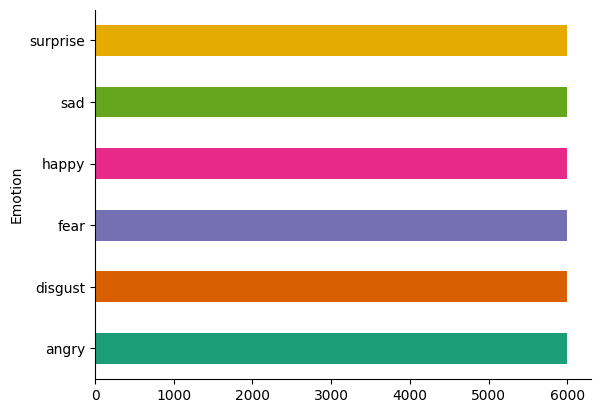

In [ ]:
# @title Emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Emotion_label'] = le.fit_transform(df['Emotion'])


In [ ]:
#drop Racial biases
df.drop(['Racial Biases'], axis=1, inplace=True)
#drop Hatred Percentage
df.drop(['Hatred Percentage',], axis=1, inplace=True)
#drop Depression Percentage
df.drop(['Depression Percentage'], axis=1, inplace=True)
#drop year
df.drop(['Year'], axis=1, inplace=True)


In [ ]:
#data preprocessing using spacy

#removing unnecessary punctuation
import re

# Data cleaning function
def process_comments(Comment):
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

df['Cleaned'] = df['Text'].apply(process_comments)
df.head()


,SL,Emotion,Text,Emotion_label,Cleaned
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...


In [ ]:
import pandas as pd

# Load Bengali stop words from a CSV file
stop_words_df = pd.read_csv('stopwords_bangla.csv')  # Assuming the CSV has one column with stop words
stop_words_df=stop_words_df.drop(['Unnamed: 0'], axis=1)
# Convert the stop words to a list
stop_words_list = stop_words_df.iloc[:, 0].tolist()  # Convert the column to a list

# Check the stop words list
print("Stop words list:", stop_words_list[:10])  # Print first 10 stop words for verification


# Function to remove stop words
def remove_stop_words(text, stop_words):
    if isinstance(text, str):  # Ensure the text is a string
        # Tokenize text (simple split for Bengali)
        words = text.split()
        # Filter out stop words
        filtered_words = [word for word in words if word not in stop_words]
        # Join words back into a single string
        return ' '.join(filtered_words)
    else:
        return text  # If text is not a string, return it as is

# Assuming 'df' is the DataFrame and 'Cleaned' is the column with text data
# Check a few entries in the original DataFrame
print("Original texts:", df['Cleaned'].head())

# Apply the function to the DataFrame
df['filtered_text'] = df['Cleaned'].apply(lambda x: remove_stop_words(x, stop_words_list))


df.head()

Stop words list: ['অই', 'অগত্যা', 'অত: পর', 'অতএব', 'অথচ', 'অথবা', 'অধিক', 'অধীনে', 'অধ্যায়', 'অনুগ্রহ']
Original texts: 0    নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1    জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2                                     ভেজাল নির্বাচন  
3    বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4    সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল  এ...
Name: Cleaned, dtype: object


,SL,Emotion,Text,Emotion_label,Cleaned,filtered_text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভোট ব...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,জনগণ মনের আনন্দে ভোট কাস্ট দেশদ্রোহী পেট্রল বো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,বিএনপি রাজাকার সমর্থকরা হেরে দেশের আমিও সন্তুষ...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...,সূক্ষ্ম কারচুপি এতদিন একটা কথার কথা বাস্তব রূপ...


In [ ]:
!pip install --upgrade pip
!pip install --upgrade tensorflow torch transformers
!pip install tqdm



In [ ]:
from transformers import AutoTokenizer, AutoModel
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import torch
import numpy as np
from tqdm import tqdm  # Import tqdm for progress bar

# Load dataset
data = df

# Ensure balanced dataset with up to 100 samples per emotion
data = data.groupby('Emotion').apply(lambda x: x.sample(n=min(len(x), 6000), random_state=42)).reset_index(drop=True)

# Split the dataset into features and labels
X = data['filtered_text']
y = data['Emotion']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load XLM-R tokenizer and model (large version)
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-large")
model = AutoModel.from_pretrained("xlm-roberta-large")

# Function to generate embeddings using XLM-R large
def generate_embeddings(texts):
    embeddings = []
    for text in tqdm(texts, desc="Generating embeddings", ncols=100):  # Add progress bar
        encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=256)
        with torch.no_grad():
            model_output = model(**encoded_input)
        embedding = model_output.last_hidden_state.mean(dim=1).numpy()  # Mean pooling
        embeddings.append(embedding)
    return np.vstack(embeddings)

# Generate embeddings for training and test sets
print("Generating embeddings for training set...")
X_train_embeddings = generate_embeddings(X_train.tolist())

print("Generating embeddings for test set...")
X_test_embeddings = generate_embeddings(X_test.tolist())

# Train a Random Forest classifier
print("Training Random Forest classifier...")
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_embeddings, y_train)

# Make predictions
y_pred = clf.predict(X_test_embeddings)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


<ipython-input-19-79af92892487>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('Emotion').apply(lambda x: x.sample(n=min(len(x), 6000), random_state=42)).reset_index(drop=True)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Generating embeddings for training set...


Generating embeddings:   0%|▏                                 | 106/28800 [01:06<4:59:08,  1.60it/s]


KeyboardInterrupt: 

In [ ]:

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1220
           1       0.93      0.87      0.90      1180
           2       0.96      0.91      0.93      1199
           3       0.86      0.85      0.86      1177
           4       0.72      0.78      0.75      1183
           5       0.91      0.91      0.91      1241

    accuracy                           0.86      7200
   macro avg       0.87      0.86      0.86      7200
weighted avg       0.87      0.86      0.86      7200

Accuracy: 0.8616666666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming X_train_embeddings, X_test_embeddings, y_train, and y_test are already defined

# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_embeddings, y_train)
y_pred_rf = clf_rf.predict(X_test_embeddings)
print("Random Forest:\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# k-Nearest Neighbors
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_embeddings, y_train)
y_pred_knn = clf_knn.predict(X_test_embeddings)
print("\nk-Nearest Neighbors:\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train_embeddings, y_train)
y_pred_nb = clf_nb.predict(X_test_embeddings)
print("\nNaive Bayes:\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# Linear Regression
clf_lr = LinearRegression()
clf_lr.fit(X_train_embeddings, y_train)
y_pred_lr = np.round(clf_lr.predict(X_test_embeddings)).astype(int)  # Round and convert to integer labels
print("\nLinear Regression:\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Logistic Regression
clf_logreg = LogisticRegression(max_iter=1000, random_state=42)
clf_logreg.fit(X_train_embeddings, y_train)
y_pred_logreg = clf_logreg.predict(X_test_embeddings)
print("\nLogistic Regression:\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Random Forest:

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1220
           1       0.93      0.87      0.90      1180
           2       0.96      0.91      0.93      1199
           3       0.86      0.85      0.86      1177
           4       0.72      0.78      0.75      1183
           5       0.91      0.91      0.91      1241

    accuracy                           0.86      7200
   macro avg       0.87      0.86      0.86      7200
weighted avg       0.87      0.86      0.86      7200

Accuracy: 0.8616666666666667

k-Nearest Neighbors:

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1220
           1       0.71      0.82      0.76      1180
           2       0.78      0.85      0.82      1199
           3       0.75      0.70      0.72      1177
           4       0.62      0.45      0.53      1183
           5      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression:

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43      1220
           1       0.43      0.49      0.46      1180
           2       0.46      0.48      0.47      1199
           3       0.54      0.57      0.55      1177
           4       0.37      0.28      0.32      1183
           5       0.46      0.45      0.46      1241

    accuracy                           0.45      7200
   macro avg       0.45      0.45      0.45      7200
weighted avg       0.45      0.45      0.45      7200

Accuracy: 0.4504166666666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the BiLSTM+GRU model
def create_bilstm_gru_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True, activation='tanh'), input_shape=input_shape),
        Dropout(0.3),
        Bidirectional(GRU(64, return_sequences=False, activation='tanh')),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare data for BiLSTM+GRU
X_train_bilstm_gru = np.expand_dims(X_train_embeddings, axis=1)
X_test_bilstm_gru = np.expand_dims(X_test_embeddings, axis=1)

# Define the input shape and number of classes
input_shape = X_train_bilstm_gru.shape[1:]
num_classes = len(np.unique(y_train))

# Create and train the BiLSTM+GRU model
bilstm_gru_model = create_bilstm_gru_model(input_shape, num_classes)
bilstm_gru_model.summary()

print("Training BiLSTM+GRU model...")
bilstm_gru_model.fit(X_train_bilstm_gru, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the BiLSTM+GRU model
print("Evaluating BiLSTM+GRU model...")
y_pred_bilstm_gru = np.argmax(bilstm_gru_model.predict(X_test_bilstm_gru), axis=1)

# Display evaluation results
print("Classification Report:")
print(classification_report(y_test, y_pred_bilstm_gru))
print("Accuracy:", accuracy_score(y_test, y_pred_bilstm_gru))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 1, 256)              │         918,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         123,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,059,462 (4.04 MB)

 Trainable params: 1,059,462 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Training BiLSTM+GRU model...
Epoch 1/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.2028 - loss: 1.7722 - val_accuracy: 0.2974 - val_loss: 1.6486
Epoch 2/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.3046 - loss: 1.6473 - val_accuracy: 0.3604 - val_loss: 1.5941
Epoch 3/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.3584 - loss: 1.5790 - val_accuracy: 0.3736 - val_loss: 1.5508
Epoch 4/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.3821 - loss: 1.5320 - val_accuracy: 0.4083 - val_loss: 1.4979
Epoch 5/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.4108 - loss: 1.4870 - val_accuracy: 0.4264 - val_loss: 1.4650
Epoch 6/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.4349 - loss: 1.4335 - val_accuracy: 0.4470 - val_loss: 1.4130
Epoch 7/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.4617 - loss: 1.3875 - val_accuracy: 0.4595 - val_loss: 1.3814
Epoch 8/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accur

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, Bidirectional
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the BiGRU model
def create_bigru_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(GRU(128, return_sequences=True, activation='tanh'), input_shape=input_shape),
        Dropout(0.3),
        Bidirectional(GRU(64, activation='tanh')),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare data for BiGRU
X_train_bigru = np.expand_dims(X_train_embeddings, axis=1)
X_test_bigru = np.expand_dims(X_test_embeddings, axis=1)

# Define the input shape and number of classes
input_shape = X_train_bigru.shape[1:]
num_classes = len(np.unique(y_train))

# Create and train the BiGRU model
bigru_model = create_bigru_model(input_shape, num_classes)
bigru_model.summary()

print("Training BiGRU model...")
bigru_model.fit(X_train_bigru, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the BiGRU model
print("Evaluating BiGRU model...")
y_pred_bigru = np.argmax(bigru_model.predict(X_test_bigru), axis=1)

# Display evaluation results
print("Classification Report:")
print(classification_report(y_test, y_pred_bigru))
print("Accuracy:", accuracy_score(y_test, y_pred_bigru))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ (None, 1, 256)              │         689,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │         123,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 830,598 (3.17 MB)

 Trainable params: 830,598 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

Training BiGRU model...
Epoch 1/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.1968 - loss: 1.7778 - val_accuracy: 0.3175 - val_loss: 1.6493
Epoch 2/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.3108 - loss: 1.6494 - val_accuracy: 0.3582 - val_loss: 1.5938
Epoch 3/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.3519 - loss: 1.5831 - val_accuracy: 0.3950 - val_loss: 1.5424
Epoch 4/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.3884 - loss: 1.5279 - val_accuracy: 0.4170 - val_loss: 1.4887
Epoch 5/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.4068 - loss: 1.5024 - val_accuracy: 0.4250 - val_loss: 1.4702
Epoch 6/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.4279 - loss: 1.4622 - val_accuracy: 0.4490 - val_loss: 1.4268
Epoch 7/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.4429 - loss: 1.4243 - val_accuracy: 0.4444 - val_loss: 1.4057
Epoch 8/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 

#mlp


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the MLP model
def create_mlp_model(input_shape, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare data for MLP
# Ensure that the input data is flattened (2D format) for MLP
X_train_mlp = X_train_embeddings.reshape(X_train_embeddings.shape[0], -1)
X_test_mlp = X_test_embeddings.reshape(X_test_embeddings.shape[0], -1)

# Define the input shape and number of classes
input_shape = (X_train_mlp.shape[1],)
num_classes = len(np.unique(y_train))

# Create and train the MLP model
mlp_model = create_mlp_model(input_shape, num_classes)
mlp_model.summary()

print("Training MLP model...")
mlp_model.fit(X_train_mlp, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the MLP model
print("Evaluating MLP model...")
y_pred_mlp = np.argmax(mlp_model.predict(X_test_mlp), axis=1)

# Display evaluation results
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,406 (931.27 KB)

 Trainable params: 238,406 (931.27 KB)

 Non-trainable params: 0 (0.00 B)

Training MLP model...
Epoch 1/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1794 - loss: 1.8131 - val_accuracy: 0.2493 - val_loss: 1.7400
Epoch 2/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2510 - loss: 1.7165 - val_accuracy: 0.3066 - val_loss: 1.6563
Epoch 3/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2979 - loss: 1.6607 - val_accuracy: 0.3505 - val_loss: 1.6009
Epoch 4/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3299 - loss: 1.6211 - val_accuracy: 0.3467 - val_loss: 1.5836
Epoch 5/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3590 - loss: 1.5801 - val_accuracy: 0.3788 - val_loss: 1.5395
Epoch 6/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3693 - loss: 1.5515 - val_accuracy: 0.3984 - val_loss: 1.5132
Epoch 7/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3975 - loss: 1.5101 - val_accuracy: 0.4248 - val_loss: 1.4656
Epoch 8/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4142 - loss: 1.4

#cnn

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(128, kernel_size=5, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Conv1D(64, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare data for CNN
X_train_cnn = np.expand_dims(X_train_embeddings, axis=-1)
X_test_cnn = np.expand_dims(X_test_embeddings, axis=-1)

# Define the input shape and number of classes
input_shape = X_train_cnn.shape[1:]
num_classes = len(np.unique(y_train))

# Create and train the CNN model
cnn_model = create_cnn_model(input_shape, num_classes)
cnn_model.summary()

print("Training CNN model...")
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=60, validation_split=0.2, verbose=1)

# Evaluate the CNN model
print("Evaluating CNN model...")
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

# Display evaluation results
print("Classification Report:")
print(classification_report(y_test, y_pred_cnn))
print("Accuracy:", accuracy_score(y_test, y_pred_cnn))


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 764, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 382, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 382, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 378, 64)             │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 189, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 189, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12096)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       1,548,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,590,982 (6.07 MB)

 Trainable params: 1,590,982 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

Training CNN model...
Epoch 1/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 130s 329ms/step - accuracy: 0.1677 - loss: 1.8000 - val_accuracy: 0.1714 - val_loss: 1.7906
Epoch 2/10
 27/384 ━━━━━━━━━━━━━━━━━━━━ 1:52 314ms/step - accuracy: 0.1634 - loss: 1.7922

KeyboardInterrupt: 